In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\cleaned_data.csv")

In [4]:
df.head()

,open,high,low,close,volume,rsi_7,cci_7,sma_100,ema_100,macd,bollinger,atr_7,next_day_close,Date,target
0,314,315,313,315,7860650,100,-66,314,314,0,314,4,281,20150102,0
1,314,315,281,281,33054400,1,-100,303,303,-1,303,15,264,20150103,0
2,281,287,257,264,55629100,1,-110,293,293,-2,293,20,274,20150104,1
3,265,278,265,274,43962800,21,-76,289,289,-2,289,18,286,20150105,1
4,274,287,272,286,23245700,38,-37,289,288,-1,289,17,294,20150106,1


In [5]:
# Define features and target variable
X = df[['open', 'high', 'low', 'close', 'volume', 'rsi_7', 'cci_7', 'sma_100', 'ema_100', 'macd', 'bollinger', 'atr_7']]
y = df['target']


In [6]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)



GaussianNB()

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


In [10]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.46      0.19      0.27       313
           1       0.54      0.81      0.65       369

    accuracy                           0.52       682
   macro avg       0.50      0.50      0.46       682
weighted avg       0.50      0.52      0.47       682



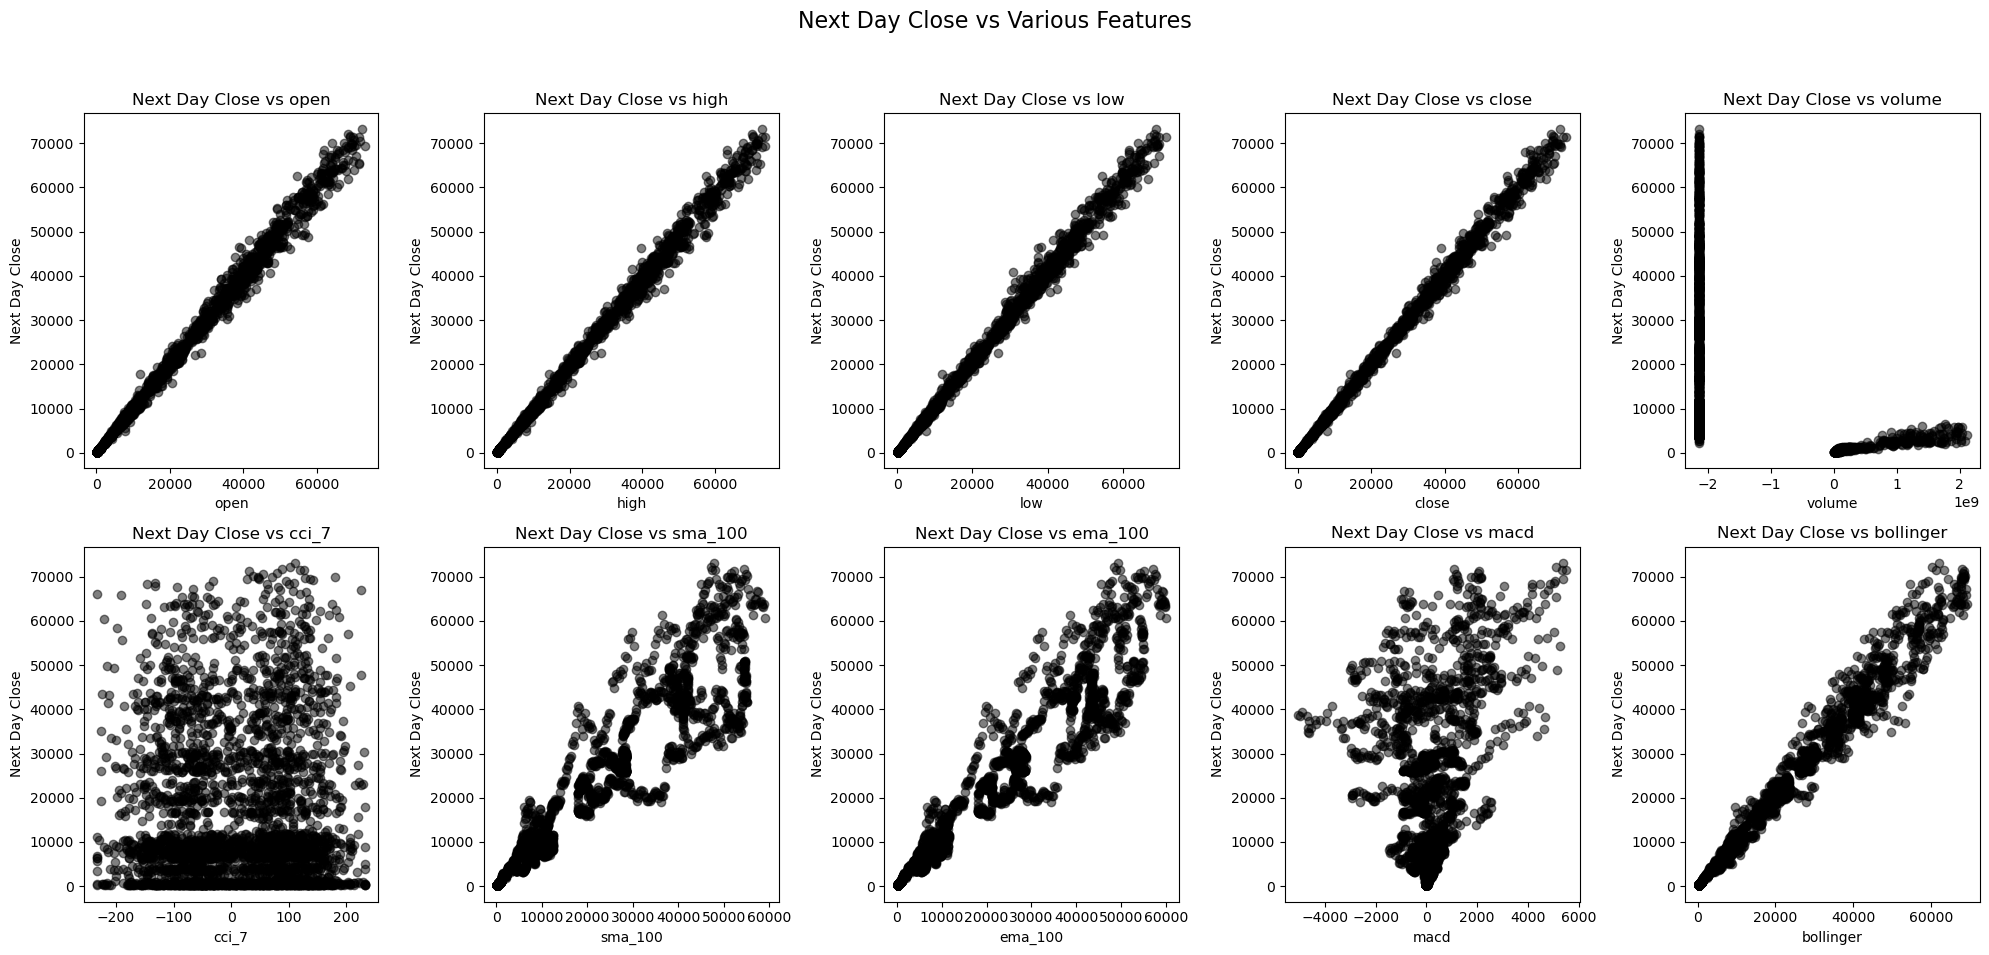

In [21]:

columns_to_plot = ['open', 'high', 'low', 'close', 'volume', 'cci_7', 
                   'sma_100', 'ema_100', 'macd', 'bollinger']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle('Next Day Close vs Various Features', fontsize=16)


for i, column in enumerate(columns_to_plot):
    ax = axes[i//5, i%5]
    ax.scatter(df[column], df['next_day_close'], alpha=0.5, color='black')
    ax.set_title(f'Next Day Close vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Next Day Close')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()
